### API Spotify

Más detalles en: https://spotipy.readthedocs.io/en/2.16.1/

Primero instalamos la librería spotipy y otras que nos hacen falta

Importante: tras hacerlo hacer Kernel + Restart para que se inicie el sistema con las librerías ya cargadas

In [1]:
modules = ["spotipy","pygame","Pillow"]


import sys
import os.path
from subprocess import check_call
import importlib
import os

def instala(modules):
    print("Instalando módulos")
    for m in modules:
        # para el import quitamos [...] y ==...
        p = m.find("[")
        mi = m if p==-1 else m[:p]
        p = mi.find("==")
        mi = mi if p==-1 else mi[:p]
        torch_loader = importlib.util.find_spec(mi)
        if torch_loader is not None:
            print(m," encontrado")
        else:
            print(m," No encontrado, instalando...",end="")  
            try:        
                r = check_call([sys.executable, "-m", "pip", "install", "--user", m])
                print("¡hecho!")
            except:
                print("¡Problema al instalar ",m,"! ¿seguro que el módulo existe?",sep="")

    print("¡Terminado!")

instala(modules)  

Instalando módulos
spotipy  encontrado
pygame  encontrado
Pillow  No encontrado, instalando...¡hecho!
¡Terminado!


Necesitaremos una cuenta, aunque sea gratuita, para crear una app y obtener las credenciales

In [35]:
# se obtienen desde https://developer.spotify.com/dashboard/
import os
os.environ["SPOTIPY_CLIENT_ID"] = "c4dc3fba88c94833aea9541328214267"
os.environ["SPOTIPY_CLIENT_SECRET"] = "2f5091aef9f54360b8435a59b29125b8"
os.environ["SPOTIPY_REDIRECT_URI"] = "http://localhost:8080"

A partir de aquí se pueden realizar muchas consultas sobre artistas, sus canciones más escuchadas, etc.

In [3]:
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

name = 'Mozart'

results = spotify.search(q='artist:' + name, type='artist')


In [4]:
results

{'artists': {'href': 'https://api.spotify.com/v1/search?query=artist%3AAlejandro+Sanz&type=artist&offset=0&limit=10',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5sUrlPAHlS9NEirDB8SEbF'},
    'followers': {'href': None, 'total': 6969595},
    'genres': ['cantautor',
     'latin arena pop',
     'latin pop',
     'mexican pop',
     'rock en espanol',
     'spanish pop'],
    'href': 'https://api.spotify.com/v1/artists/5sUrlPAHlS9NEirDB8SEbF',
    'id': '5sUrlPAHlS9NEirDB8SEbF',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5eb45b242f20217176f7e83857b',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab6761610000517445b242f20217176f7e83857b',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f17845b242f20217176f7e83857b',
      'width': 160}],
    'name': 'Alejandro Sanz',
    'popularity': 78,
    'type': 'artist',
    'uri': 'spotify:artist:5sUrl

**Ejercicio** Como vemos `results` es un diccionario, la clave `items` es una lista con todos los artistas que encajan en nuestra búsqueda (para simplificar supongamos que hay al menos 1). Escribir código para hacer que en la variable `artist` quede el primer artista de la lista, es decir el primer elemento de `items`

In [5]:
artist = results['artists']['items'][0]


El siguiente código debe mostrar:

    {'external_urls': {'spotify': 'https://open.spotify.com/artist/3h8OjAdgYXVRoMZ8jFd6Uw'},
     'followers': {'href': None, 'total': 492738},
     'genres': ['flamenco', 'flamenco guitar', 'rumba'],
     'href': 'https://api.spotify.com/v1/artists/3h8OjAdgYXVRoMZ8jFd6Uw',
     'id': '3h8OjAdgYXVRoMZ8jFd6Uw',
     'images': [{'height': 686,
       'url': 'https://i.scdn.co/image/da661057b736c36095e5db589993654fef887cb9',
       'width': 1000},
      {'height': 439,
       'url': 'https://i.scdn.co/image/280b33749190ccbe8d584ada580e693dba1142ae',
       'width': 640},
      {'height': 137,
       'url': 'https://i.scdn.co/image/a13bc3caee13ac86608d7bef98a84b3cbd7e438c',
       'width': 200},
      {'height': 44,
       'url': 'https://i.scdn.co/image/a9e1bc6b92ee23fd0aa332c5ee08f1f87f049f2d',
       'width': 64}],
     'name': 'Paco de Lucía',
     'popularity': 56,
     'type': 'artist',
     'uri': 'spotify:artist:3h8OjAdgYXVRoMZ8jFd6Uw'}

In [6]:
artist # para probar

{'external_urls': {'spotify': 'https://open.spotify.com/artist/5sUrlPAHlS9NEirDB8SEbF'},
 'followers': {'href': None, 'total': 6969595},
 'genres': ['cantautor',
  'latin arena pop',
  'latin pop',
  'mexican pop',
  'rock en espanol',
  'spanish pop'],
 'href': 'https://api.spotify.com/v1/artists/5sUrlPAHlS9NEirDB8SEbF',
 'id': '5sUrlPAHlS9NEirDB8SEbF',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb45b242f20217176f7e83857b',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab6761610000517445b242f20217176f7e83857b',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f17845b242f20217176f7e83857b',
   'width': 160}],
 'name': 'Alejandro Sanz',
 'popularity': 78,
 'type': 'artist',
 'uri': 'spotify:artist:5sUrlPAHlS9NEirDB8SEbF'}

Con un poquito de magía (y de nuevo la librería requests) podemos obtener la imagen directamente

**Ejercicio** Declarar una variable `imagen` que extraiga de `artist`el primer elemento del array `images`

In [7]:
imagen = artist['images'][0]['url']

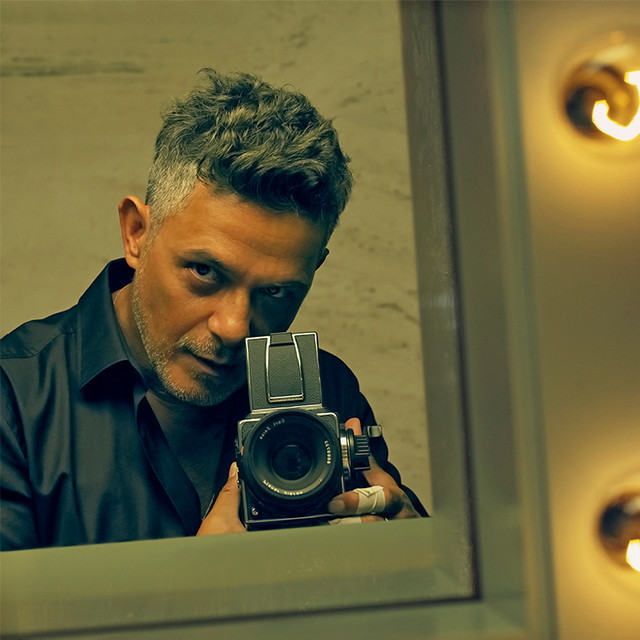

In [8]:
from PIL import Image  # ojo, esta librería podría fallar, depende del sistema concreto
import requests

im = Image.open(requests.get(artist['images'][0]['url'], stream=True).raw)
im

In [9]:
artist

{'external_urls': {'spotify': 'https://open.spotify.com/artist/5sUrlPAHlS9NEirDB8SEbF'},
 'followers': {'href': None, 'total': 6969595},
 'genres': ['cantautor',
  'latin arena pop',
  'latin pop',
  'mexican pop',
  'rock en espanol',
  'spanish pop'],
 'href': 'https://api.spotify.com/v1/artists/5sUrlPAHlS9NEirDB8SEbF',
 'id': '5sUrlPAHlS9NEirDB8SEbF',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb45b242f20217176f7e83857b',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab6761610000517445b242f20217176f7e83857b',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f17845b242f20217176f7e83857b',
   'width': 160}],
 'name': 'Alejandro Sanz',
 'popularity': 78,
 'type': 'artist',
 'uri': 'spotify:artist:5sUrlPAHlS9NEirDB8SEbF'}

**Ejercicio** Extraer de `artist` el valor asociado a la clave `id` y dejarlo en una variable `id`. Es el identificador del artista en spotify

In [10]:
id = artist["id"]

El siguiente código extrae datos de las canciones más populares del artista

In [11]:

canciones = spotify.artist_top_tracks(id)
canciones

{'tracks': [{'album': {'album_type': 'compilation',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'},
      'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of',
      'id': '0LyfQWJT6nXafLPZqxe9Of',
      'name': 'Various Artists',
      'type': 'artist',
      'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/2iJ4m1pRQ7zLlHP8VO343u'},
    'href': 'https://api.spotify.com/v1/albums/2iJ4m1pRQ7zLlHP8VO343u',
    'id': '2iJ4m1pRQ7zLlHP8VO343u',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273e39c5be504fdfb386d52ce63',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02e39c5be504fdfb386d52ce63',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851e39c5be504fdfb386d52ce63',
      'width': 64}],
    'name': 'Sanz: Lo que fui es lo que 

**Ejercicio**
Dejar ahora en una variable `url` el valor asociado a la clave `preview_url` del primer elemento de la lista `tracks`.

Ojo, en muchos casos no se incluye un 'preview' de la canción y este ejercicio no mostrará nada

In [31]:
url = canciones["tracks"][0]['preview_url']
url # para probar, si está vacio es que esa canción no tiene muestra y no la podemos escuchar

'https://p.scdn.co/mp3-preview/9aceaf98e36374e9f5ff5b8fd66a5af4b5a306eb?cid=c4dc3fba88c94833aea9541328214267'

**Ejercicio** utilizar la librería requests para descargarse el fichero asociado a url, que se grabará a continuación localmente con el nombre 'cancion.mp3'

In [32]:
nombre = "./cancion.mp3"
import requests

r = requests.get(url, allow_redirects=True) # el fichero queda en la variable r
if r.status_code==200:
    with open(nombre, 'wb') as f:
        f.write(r.content)
else:
    print("Error")

finalmente probamos a intentar reproducir la música

In [33]:
from pygame import mixer  # Load the popular external library

mixer.init()
mixer.music.load(nombre)
mixer.music.play()


In [34]:
mixer.quit() # para pararlo